In [1]:
%load_ext autoreload
%autoreload 2
from typing import Callable

import numpy as np
from matplotlib import pyplot as plt


from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_pairs_siblings,
    histogram_pairs_parent_child,
    scatter_pairs,
    boxplot_scores,
    display_str,
    input_data,
    get_siblings_data
)

def f(x: list[TreeTypes], y: list[TreeTypes], fn: Callable[[Tree], list[Score]]): return x, y, fn

def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False

    
analyzed_types = [
    (["internal"], ["not_solved"], all_mols),
    (["internal", "solved"], ["not_solved"], all_mols),
    (["solved"], ["internal"], all_mols),
    (["solved"], ["not_solved"], all_mols),
    (["internal"], ["not_solved"], expandable_mols)]

In [2]:
histogram_siblings_data = get_siblings_data(analyzed_types, detailed)

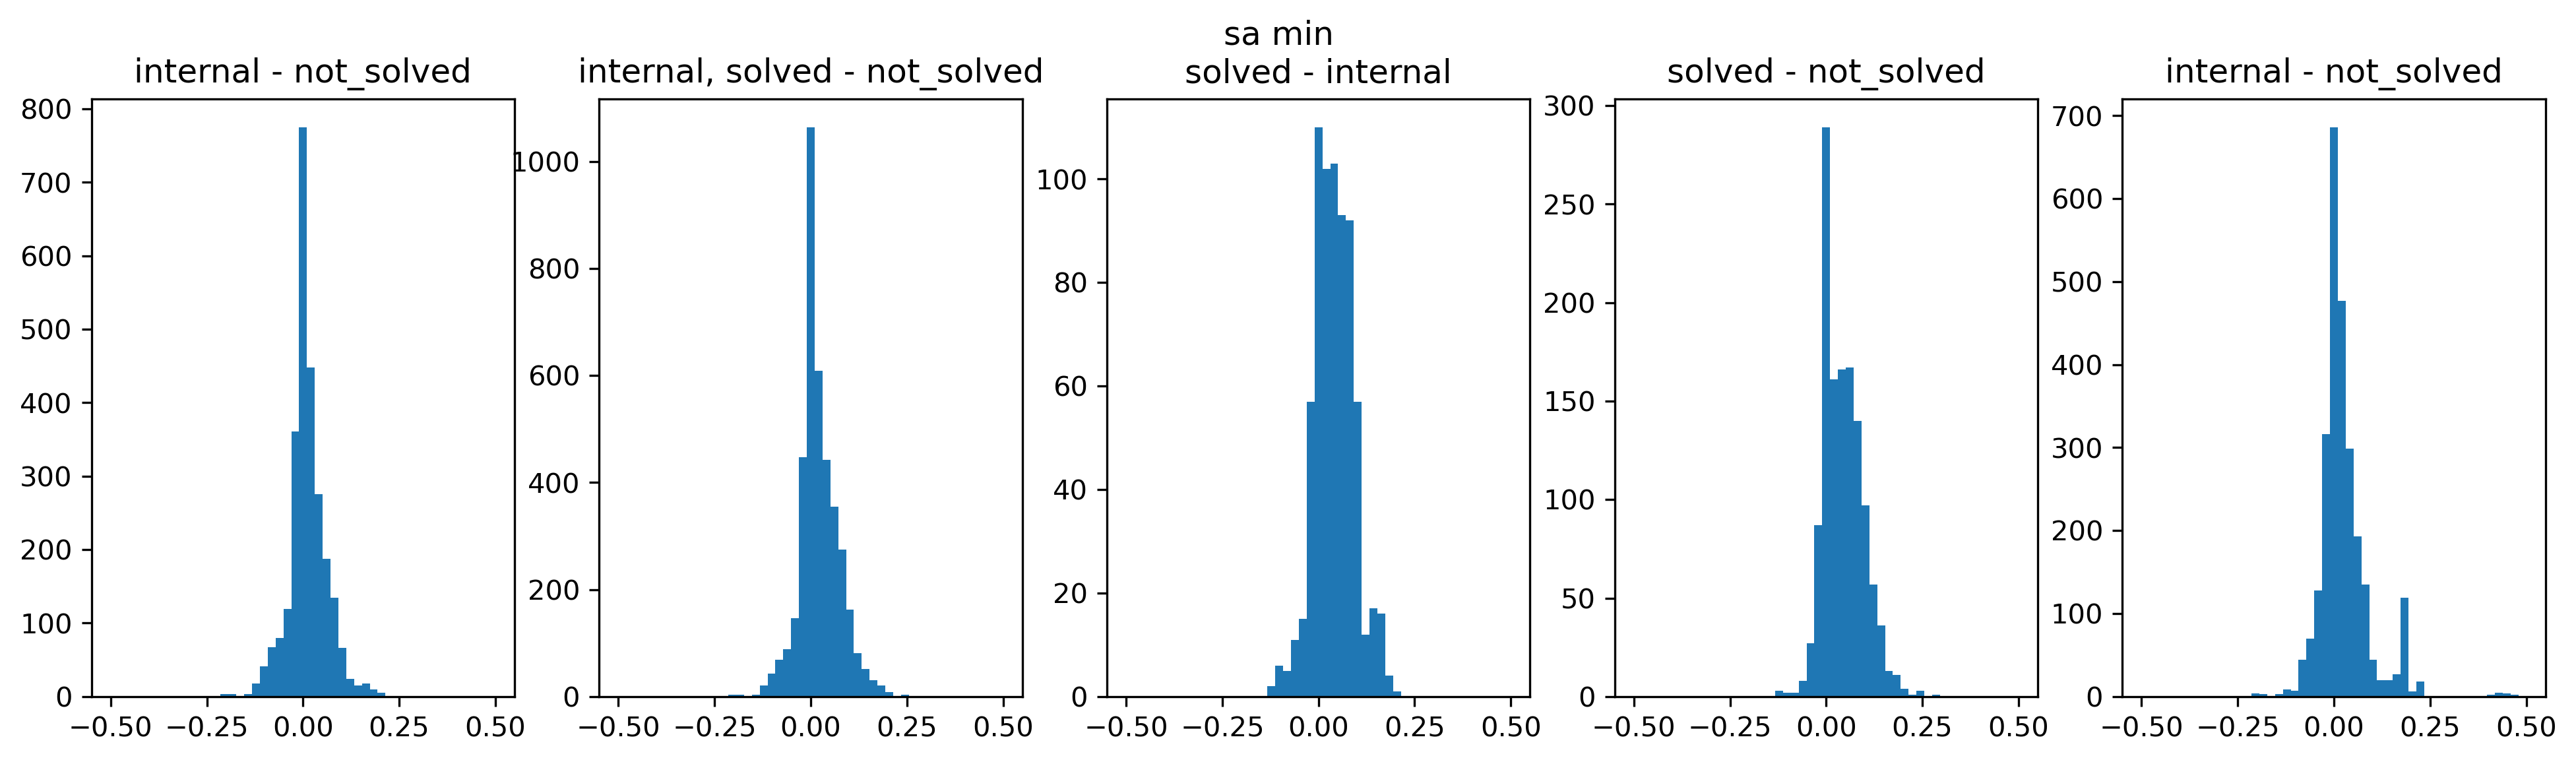

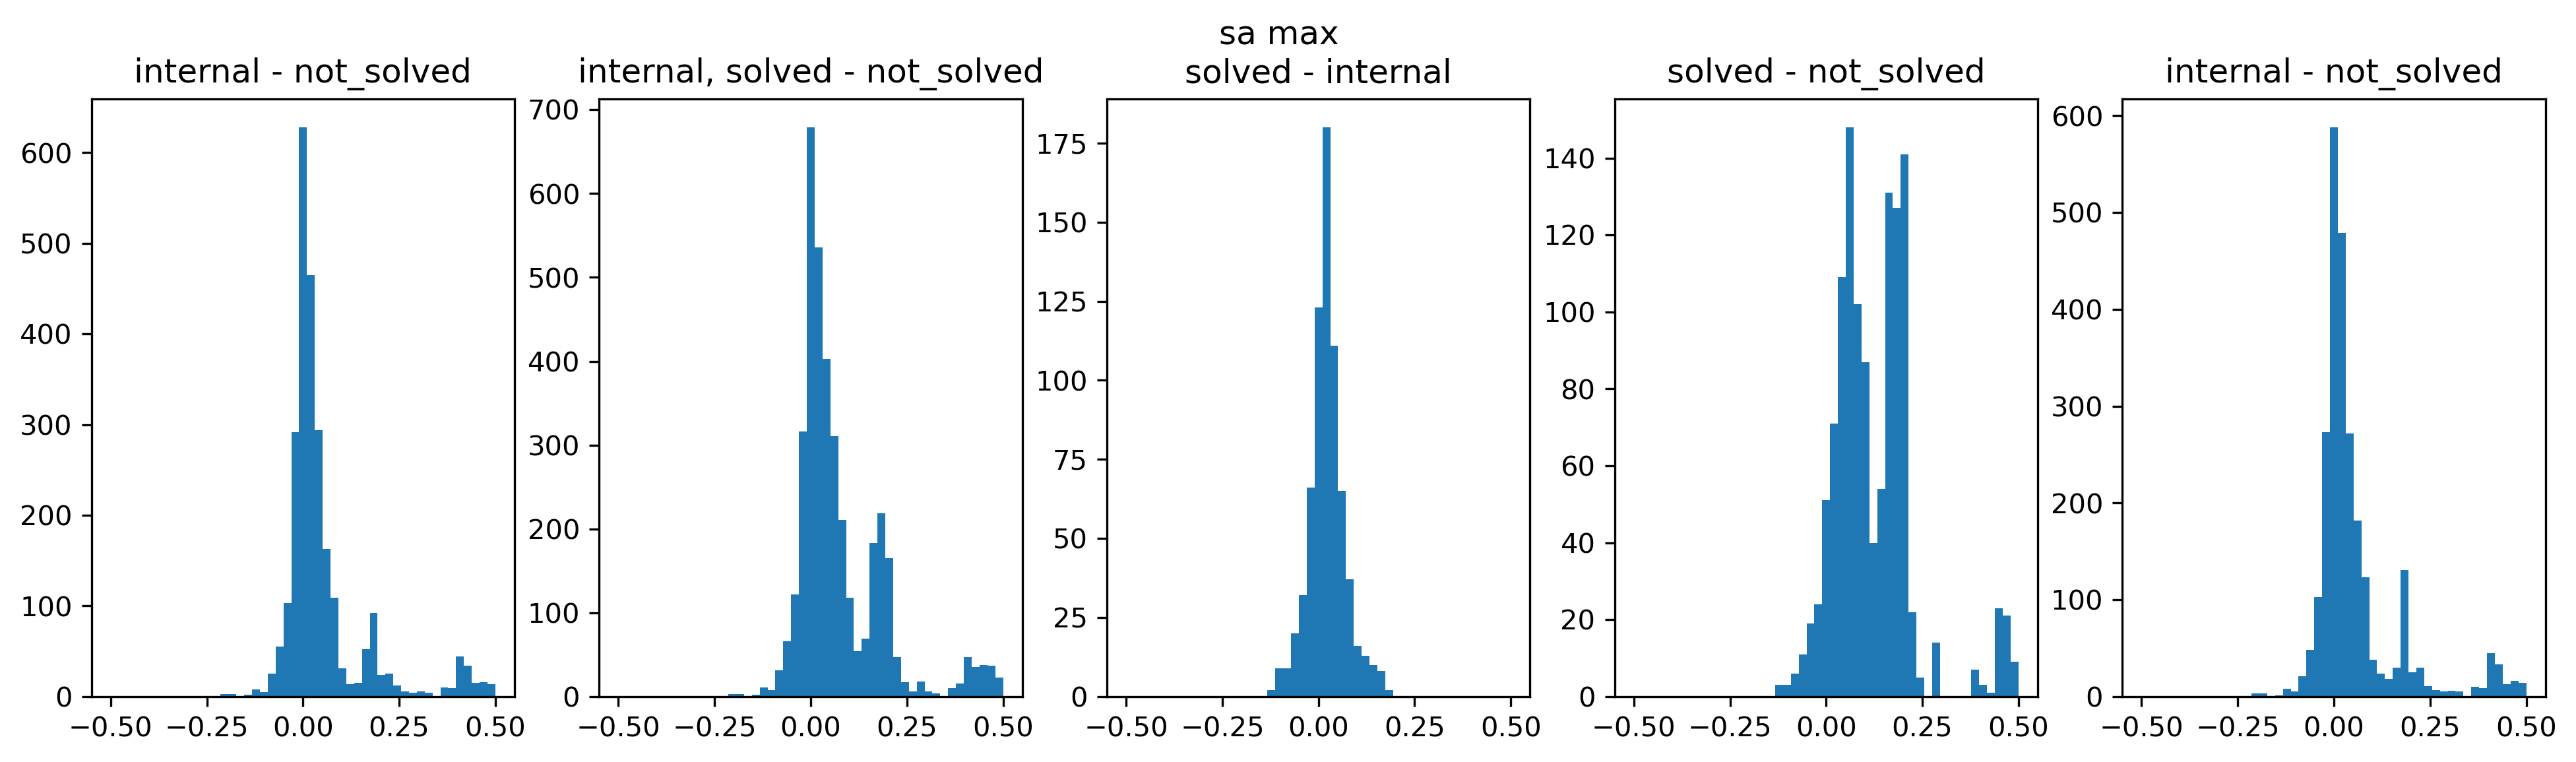

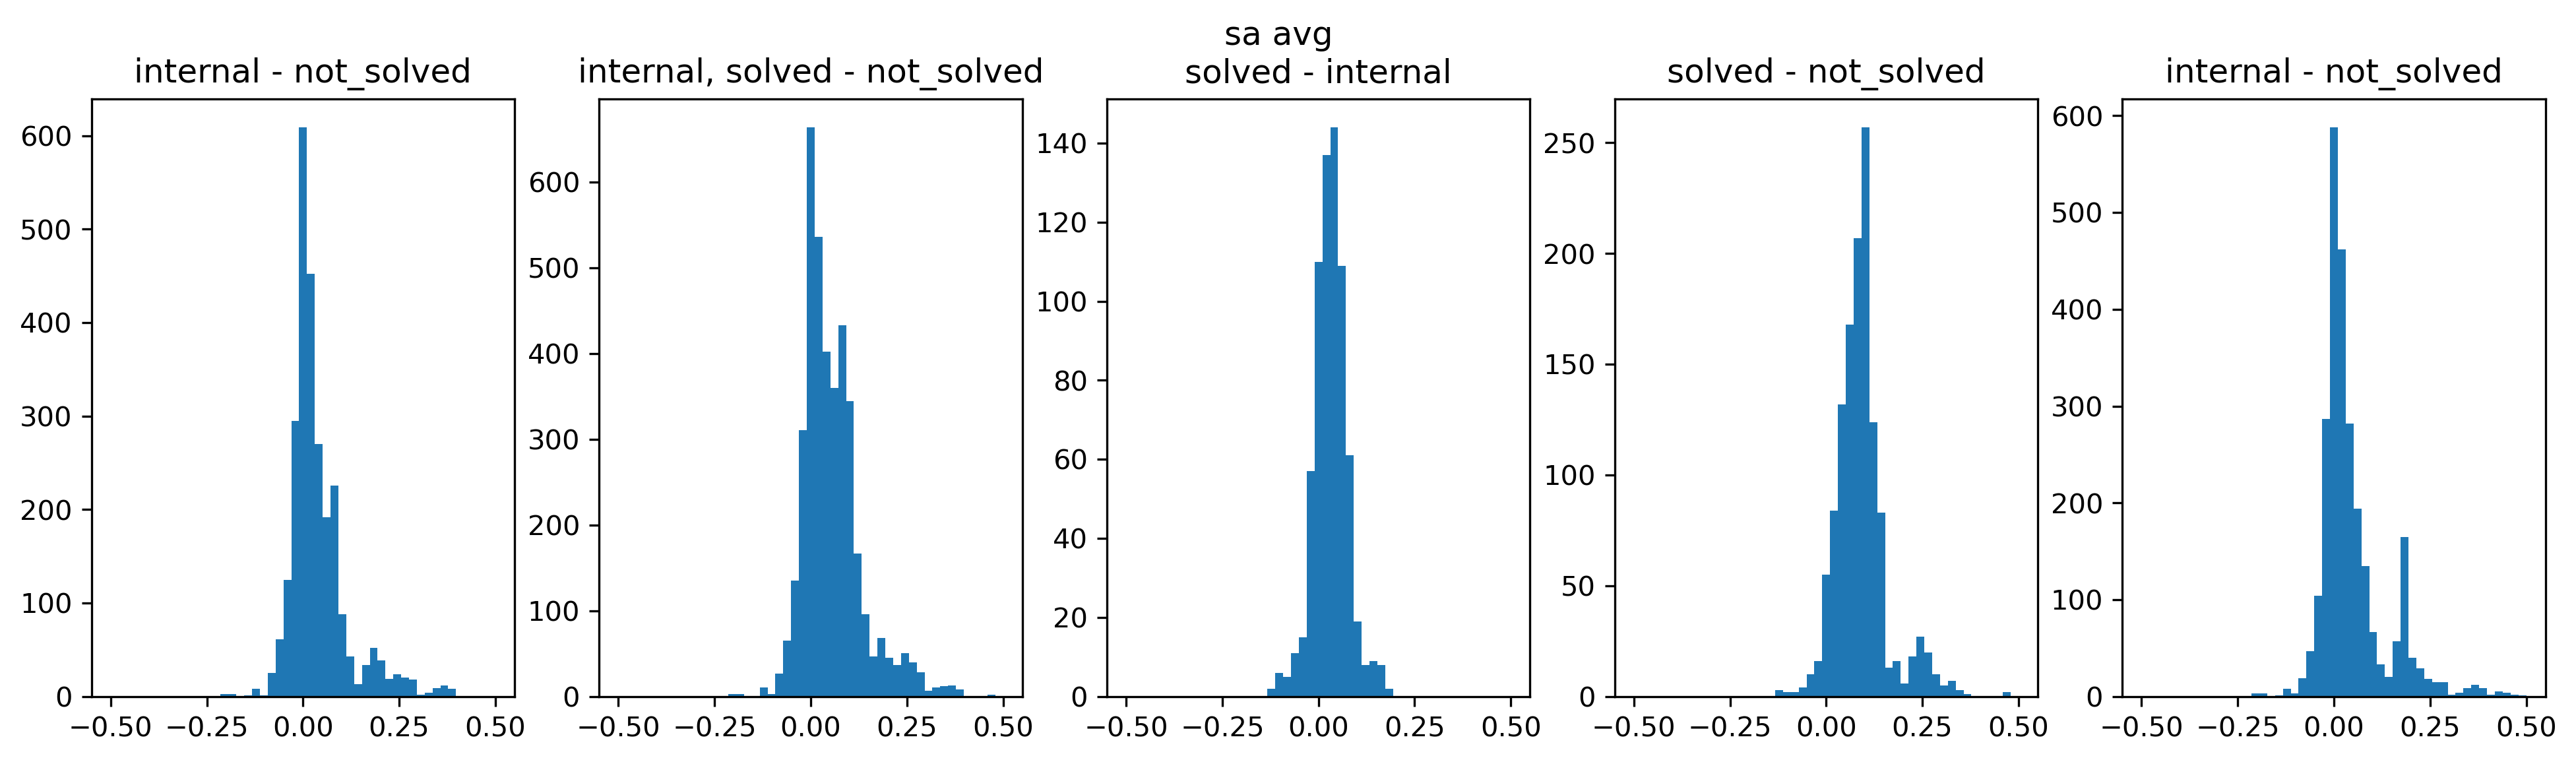

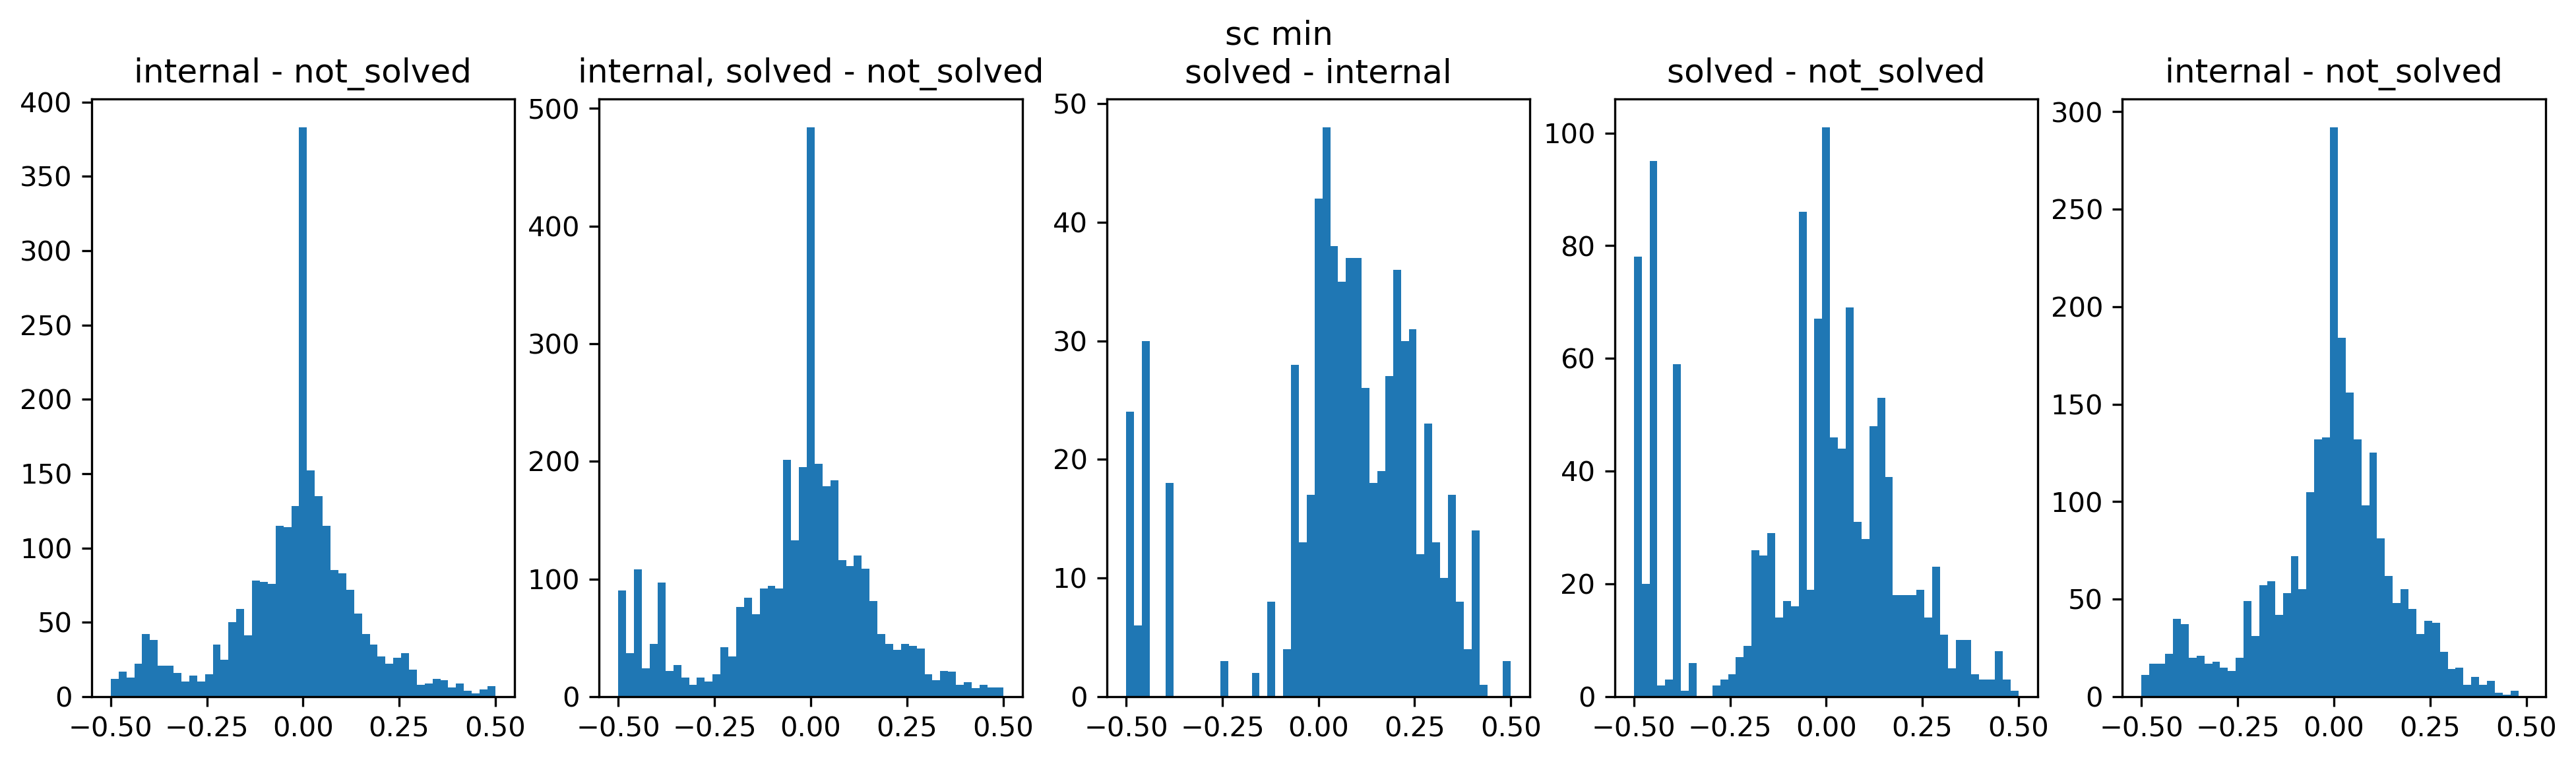

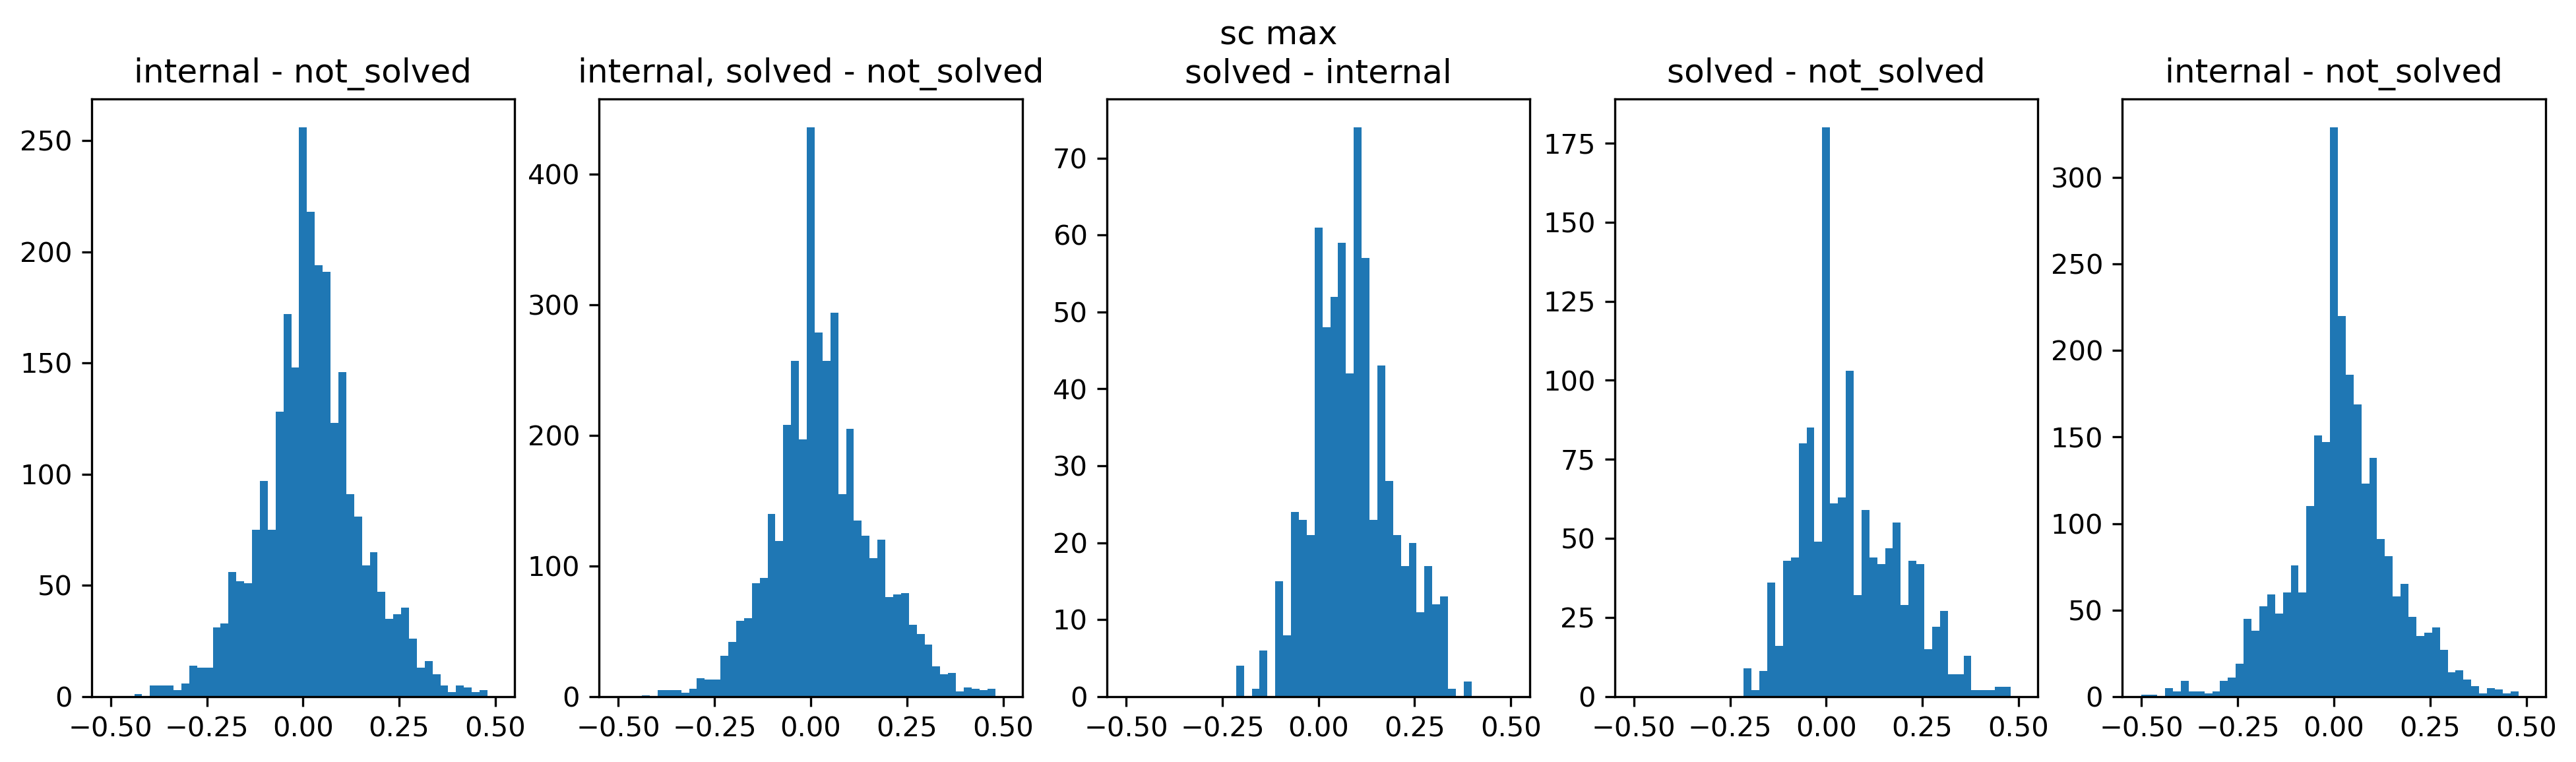

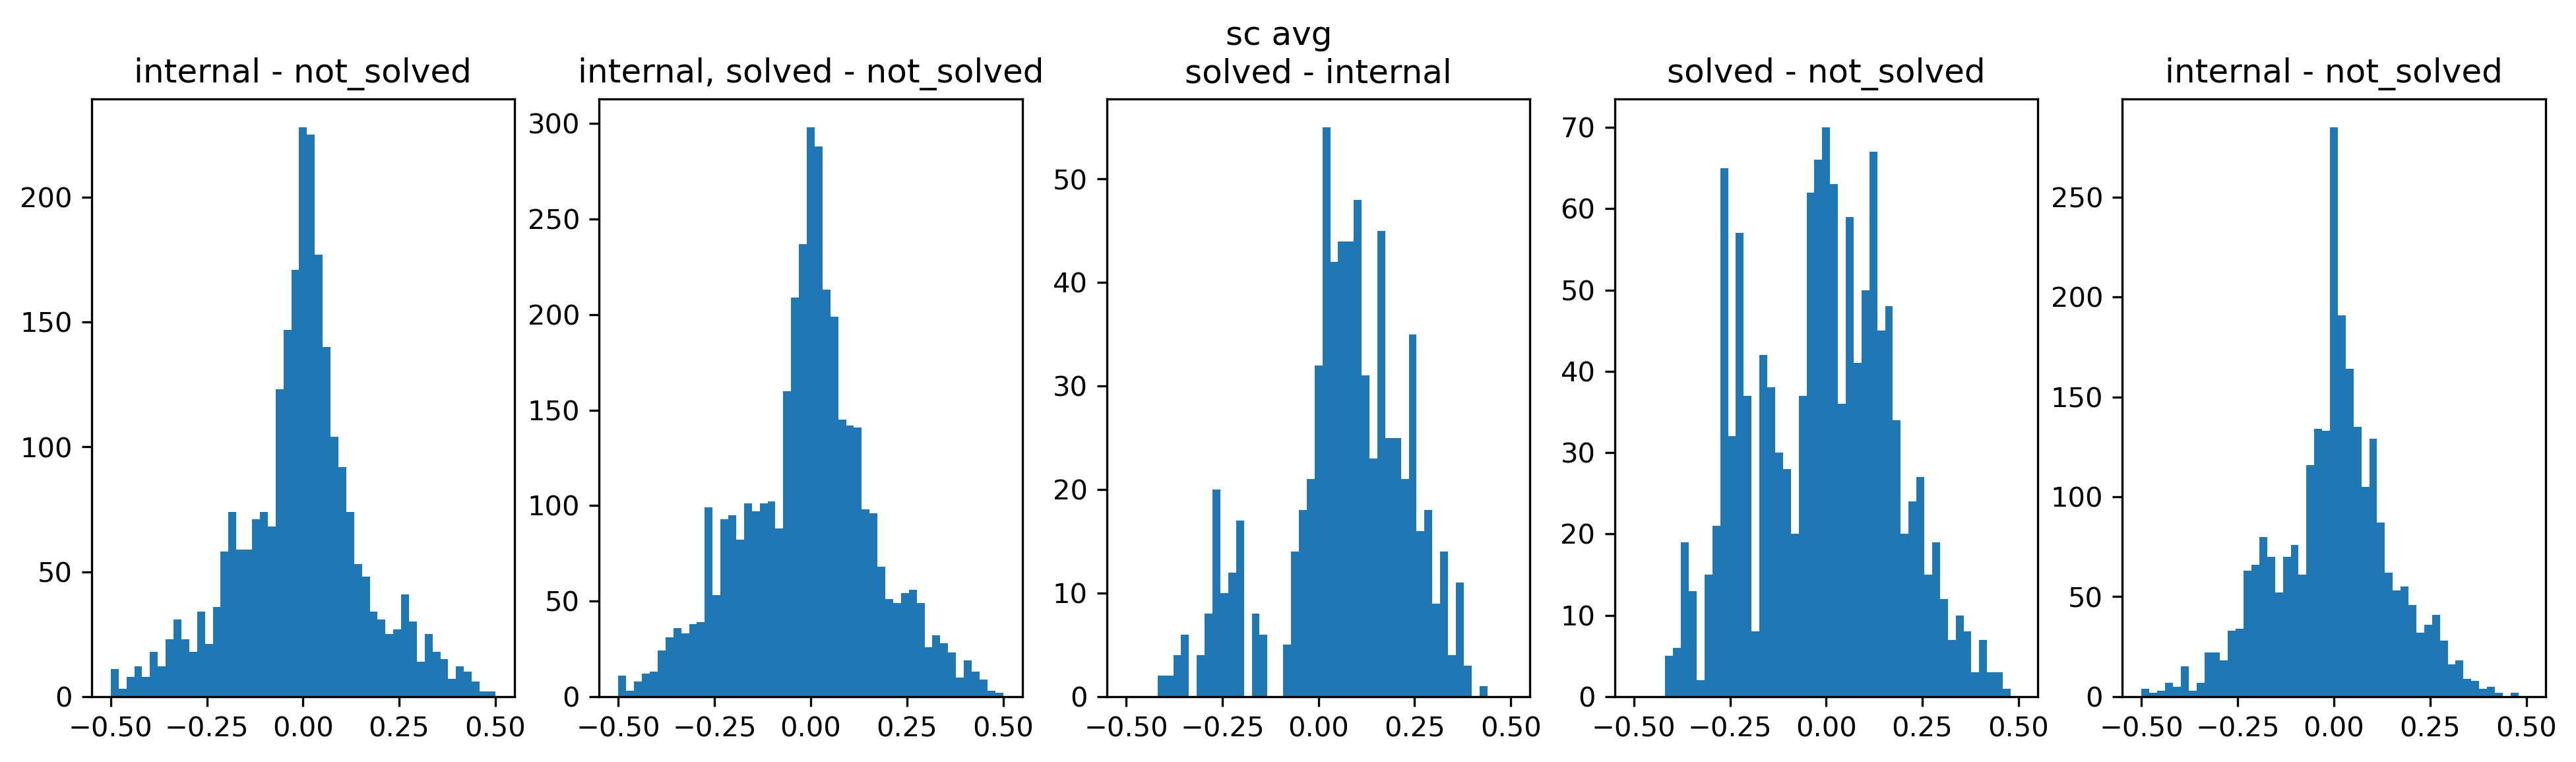

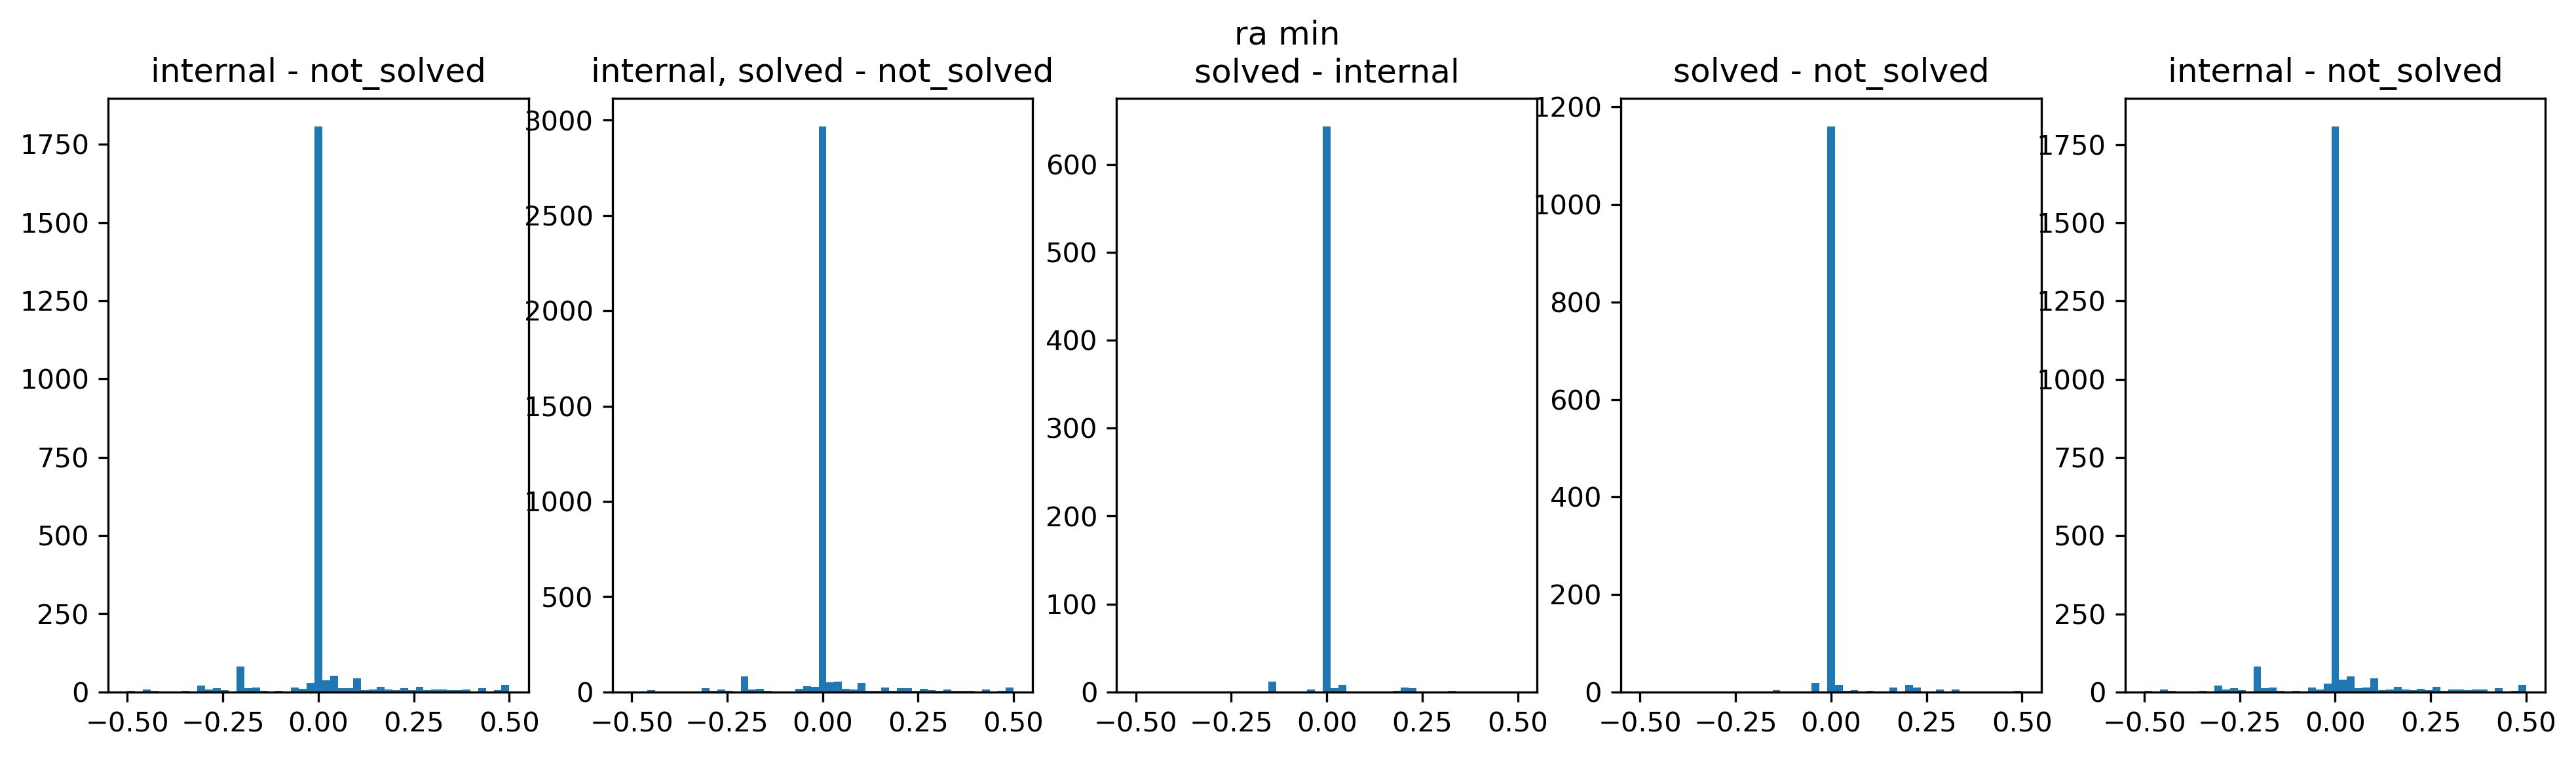

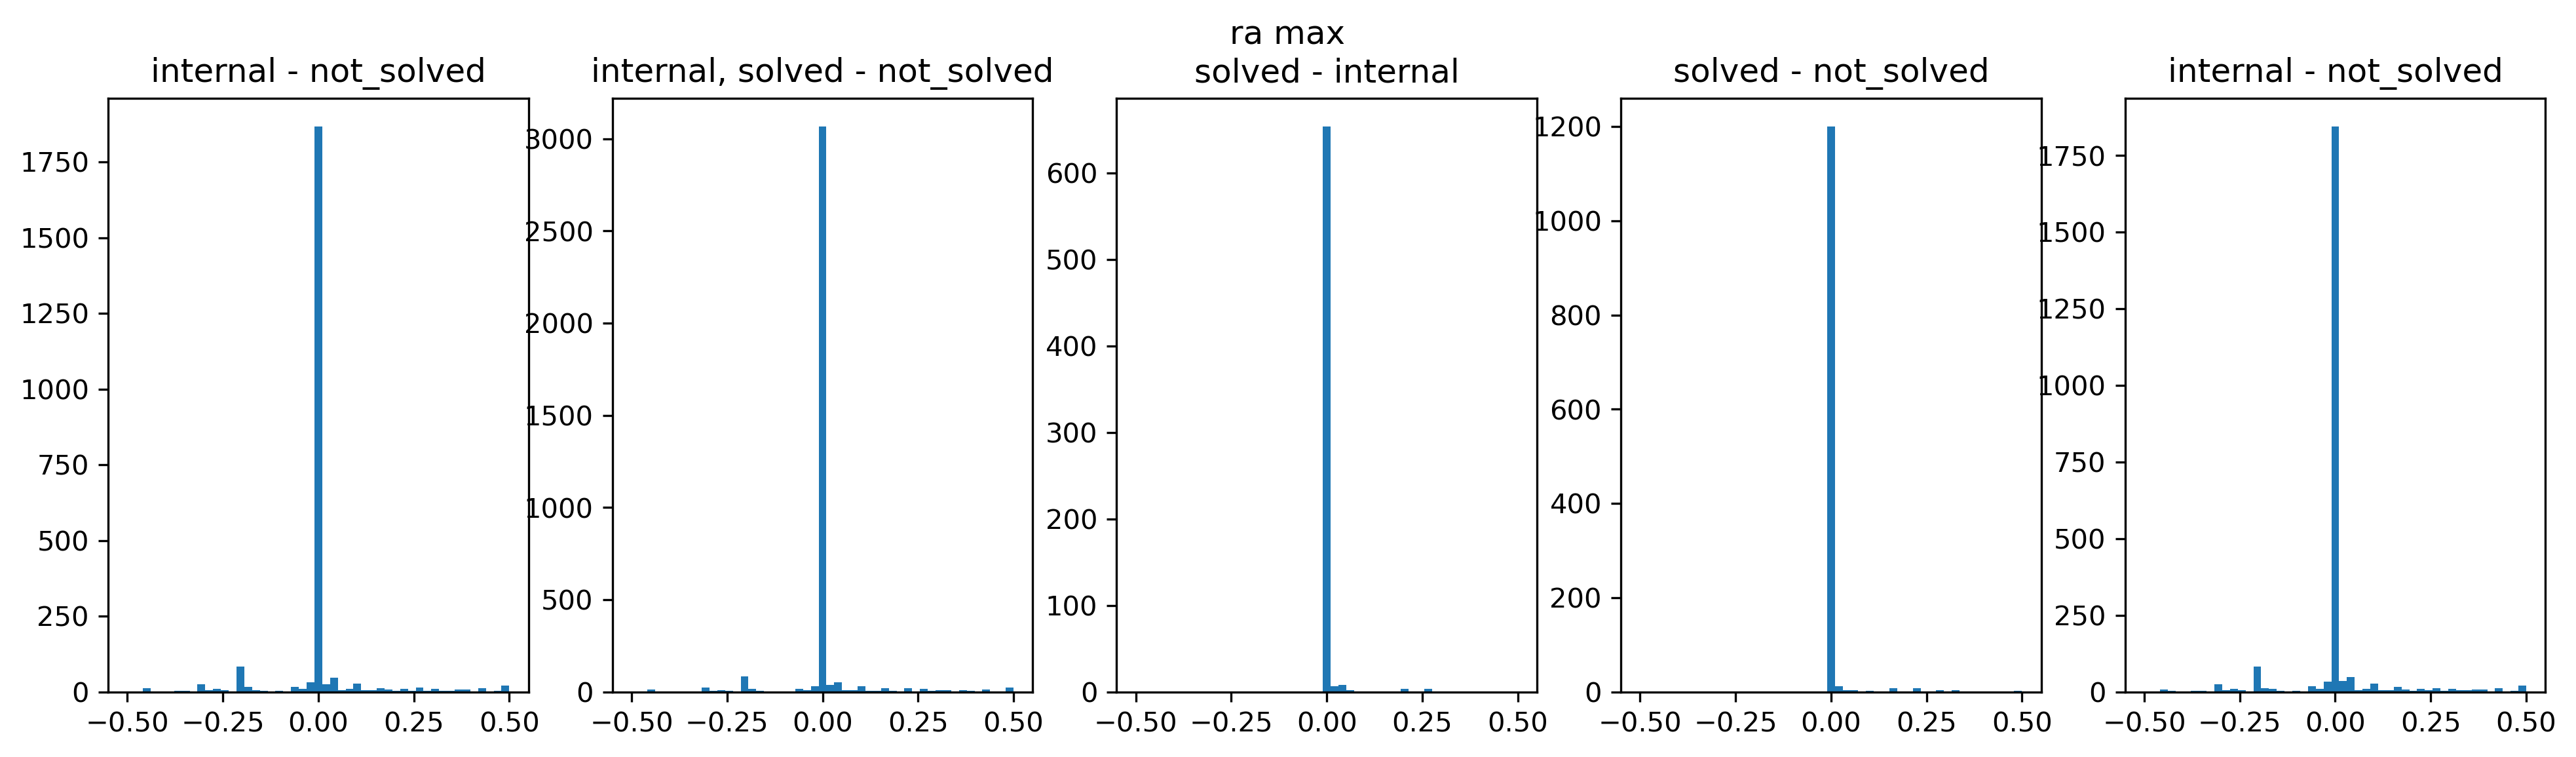

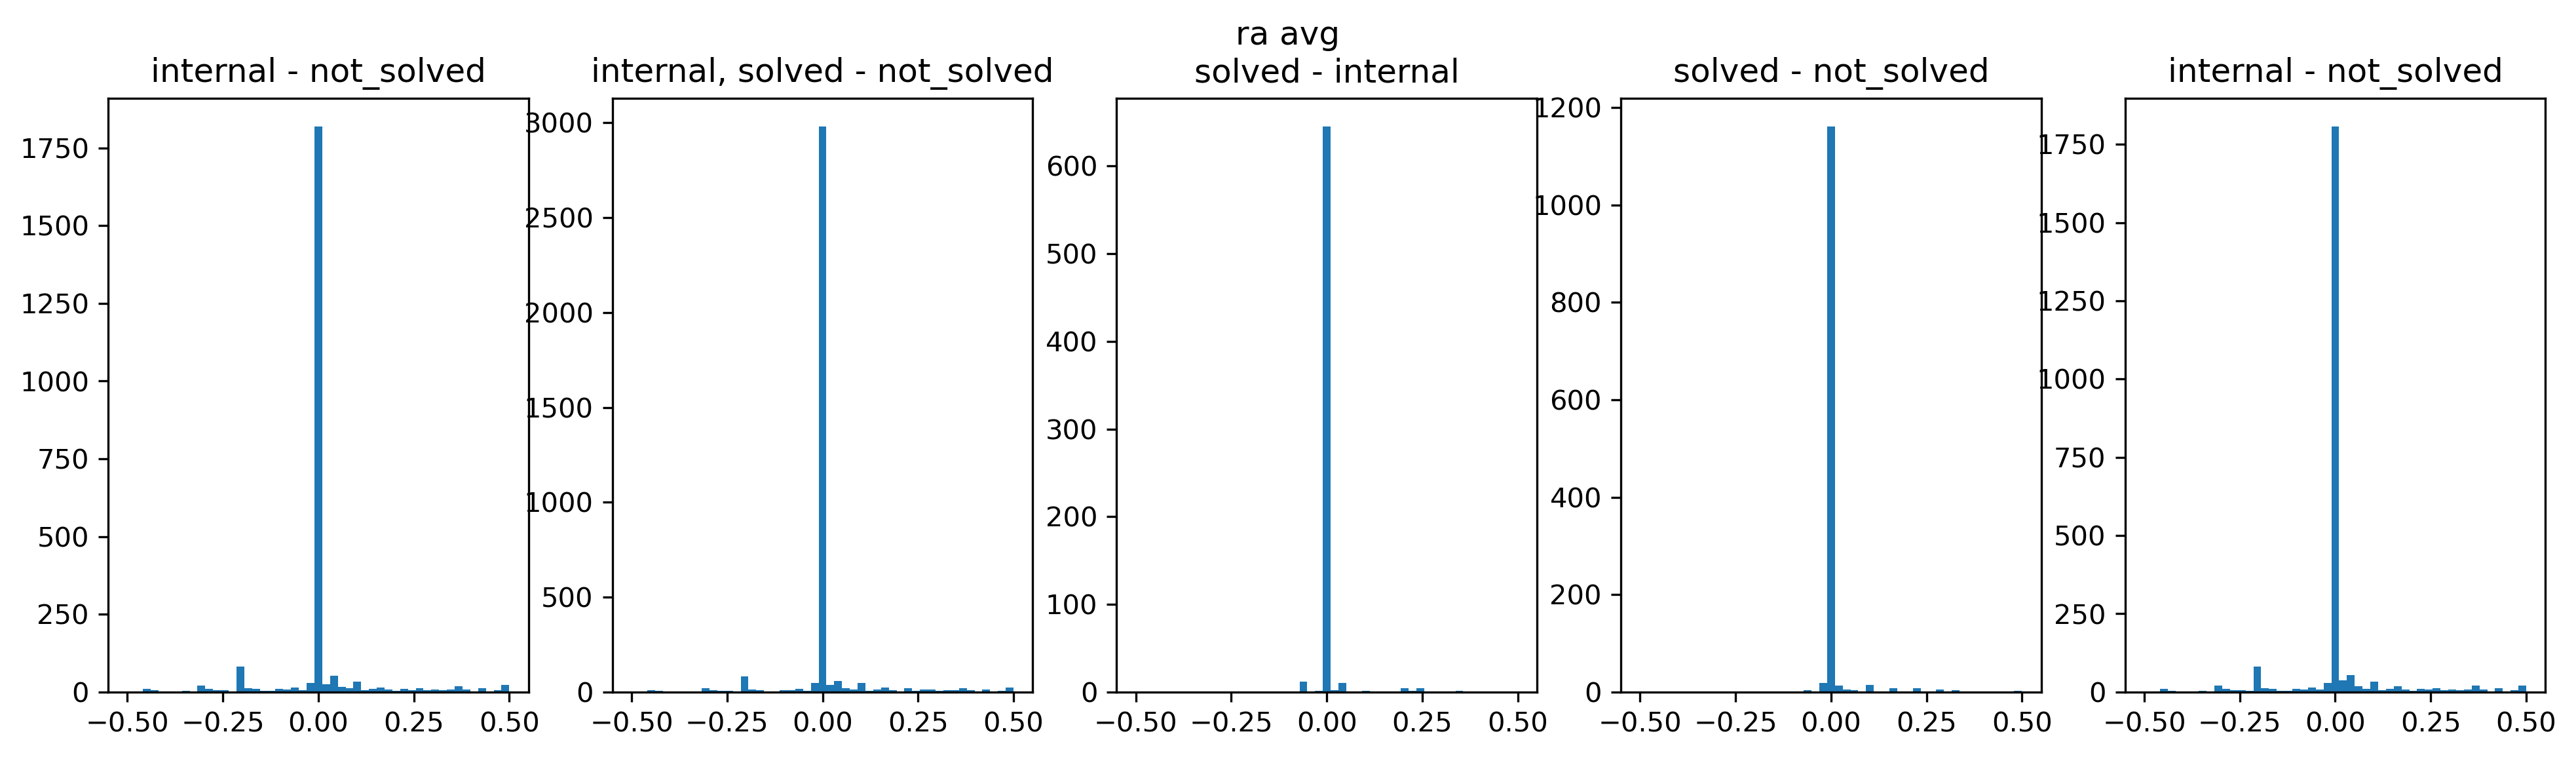

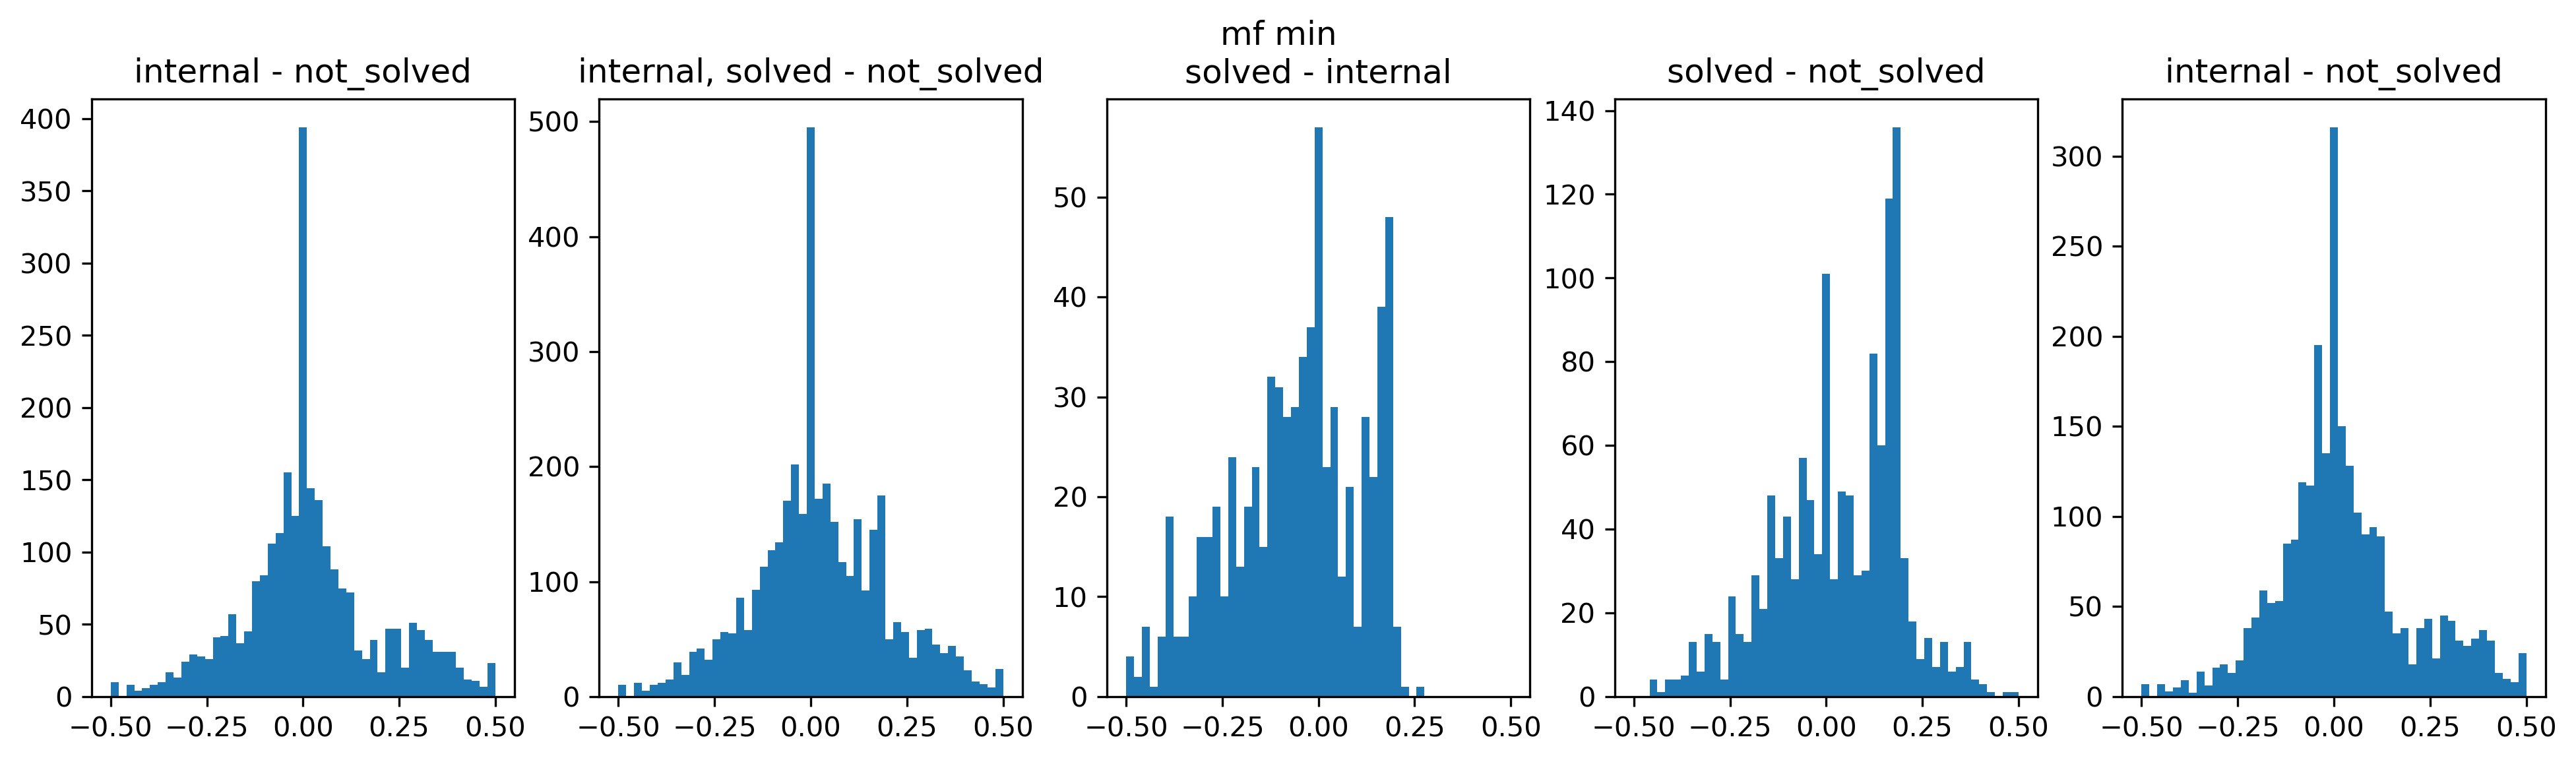

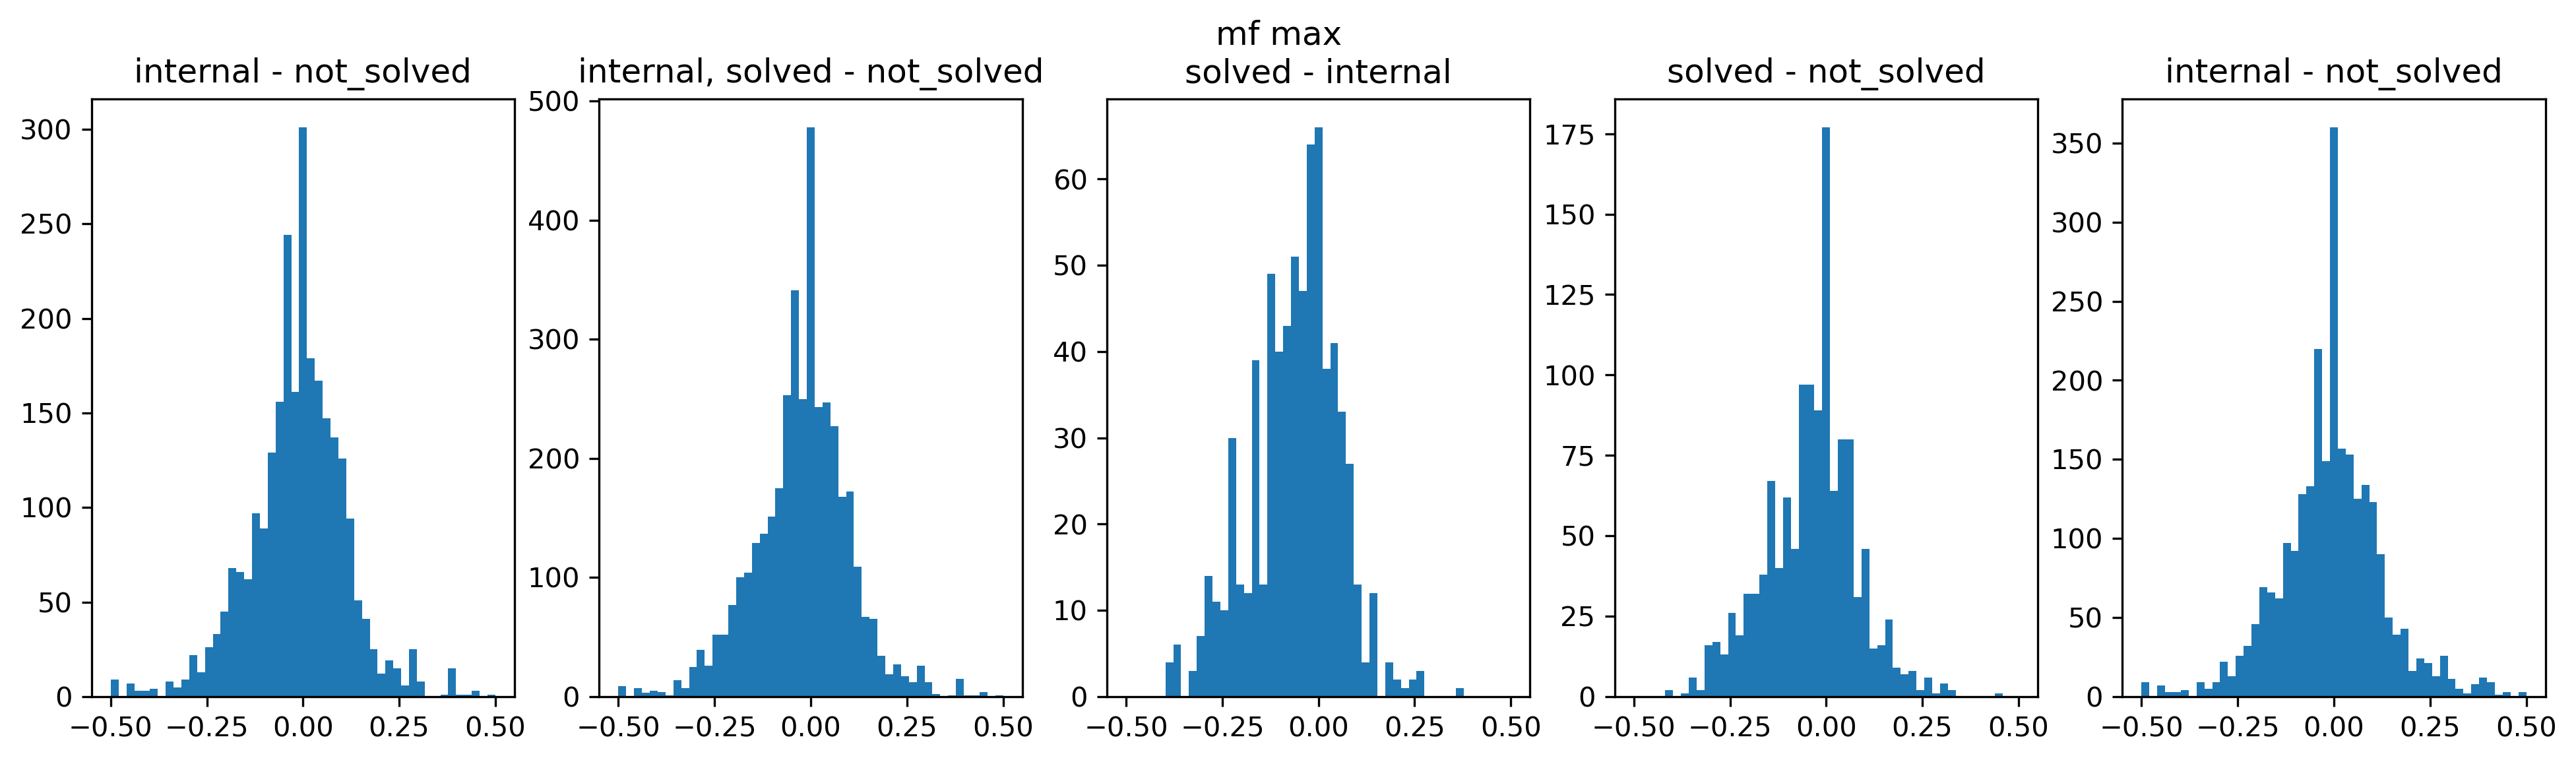

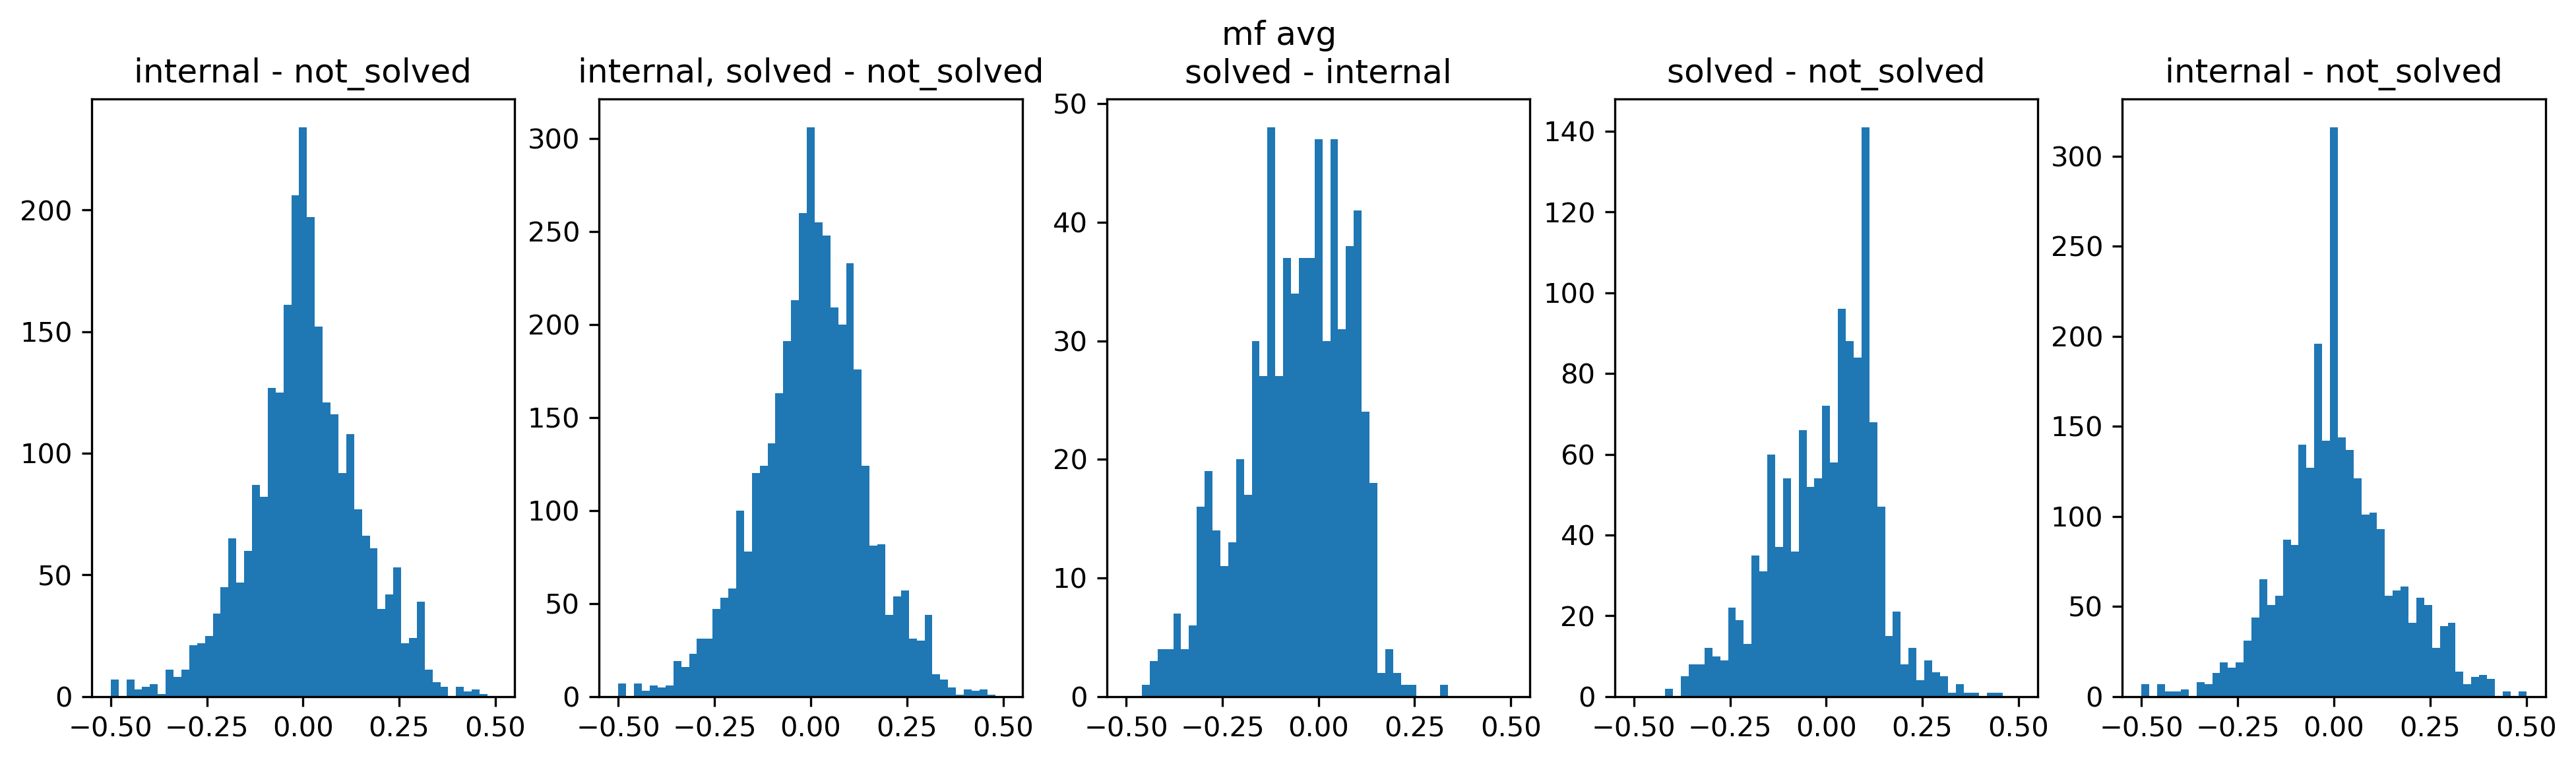

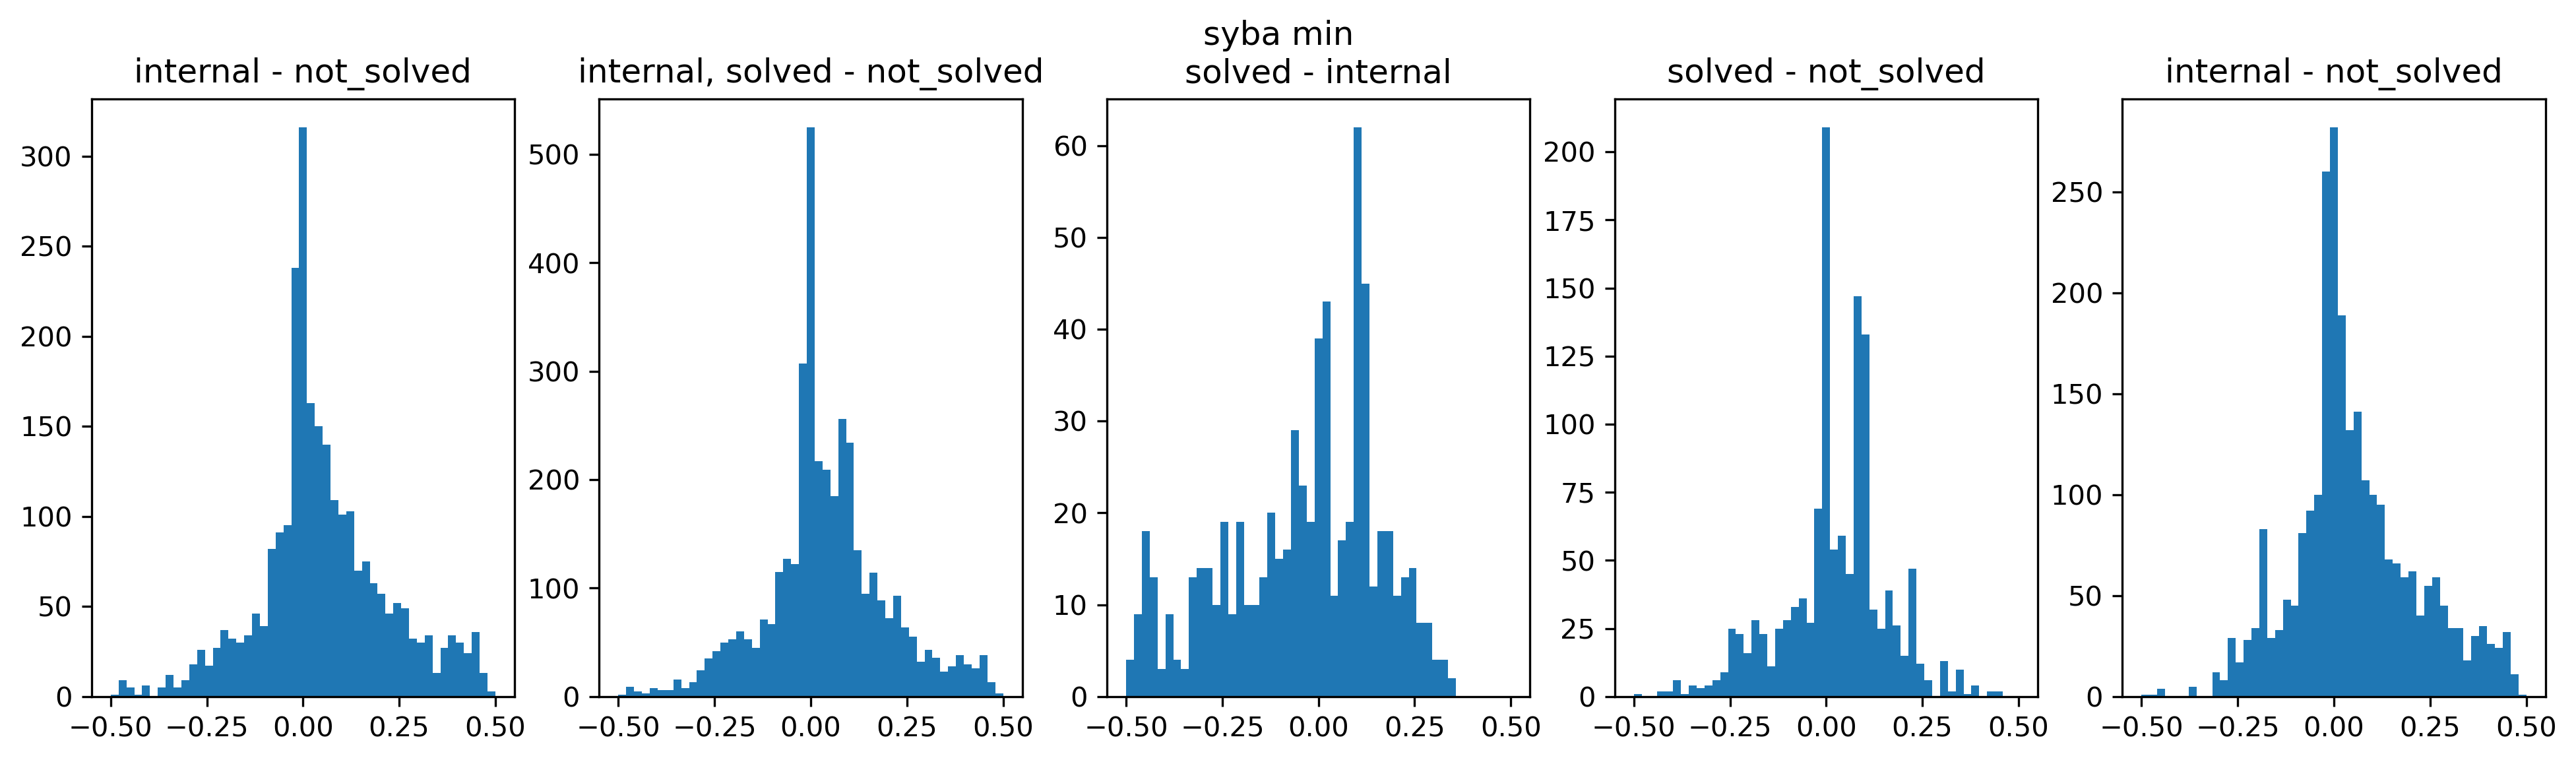

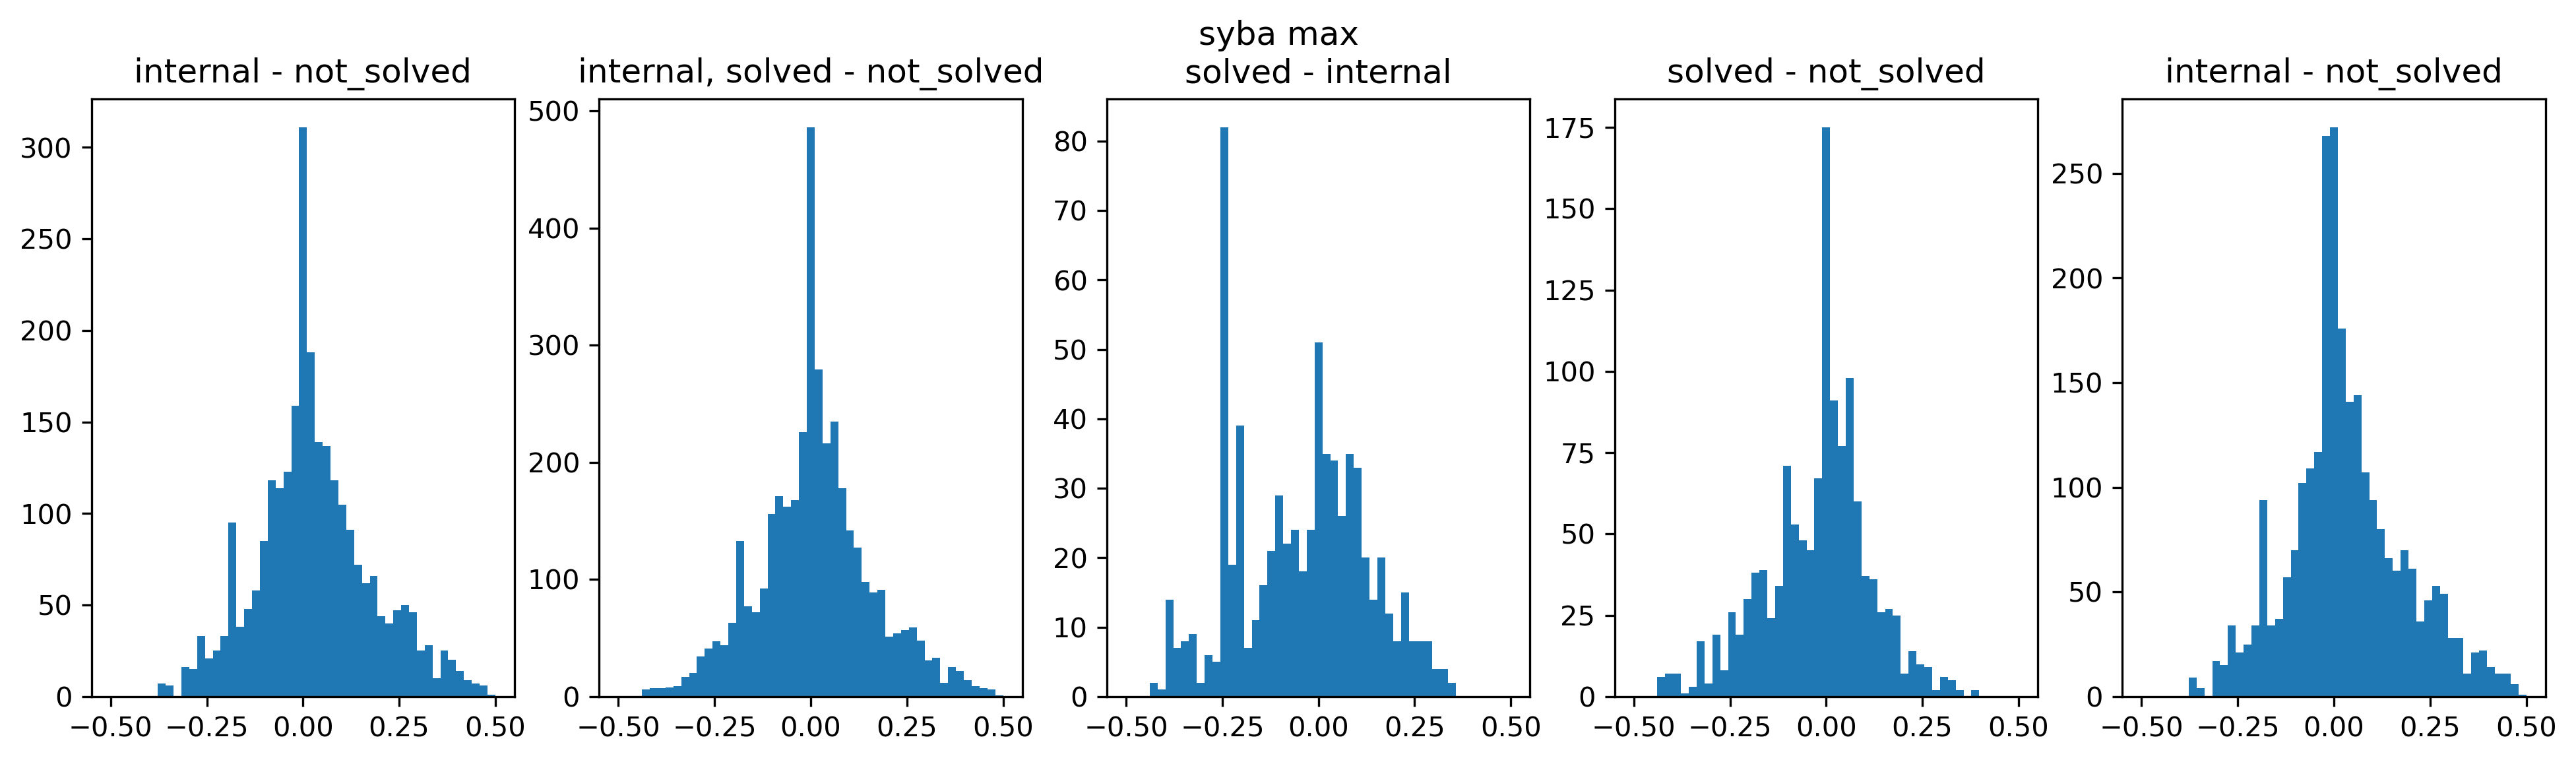

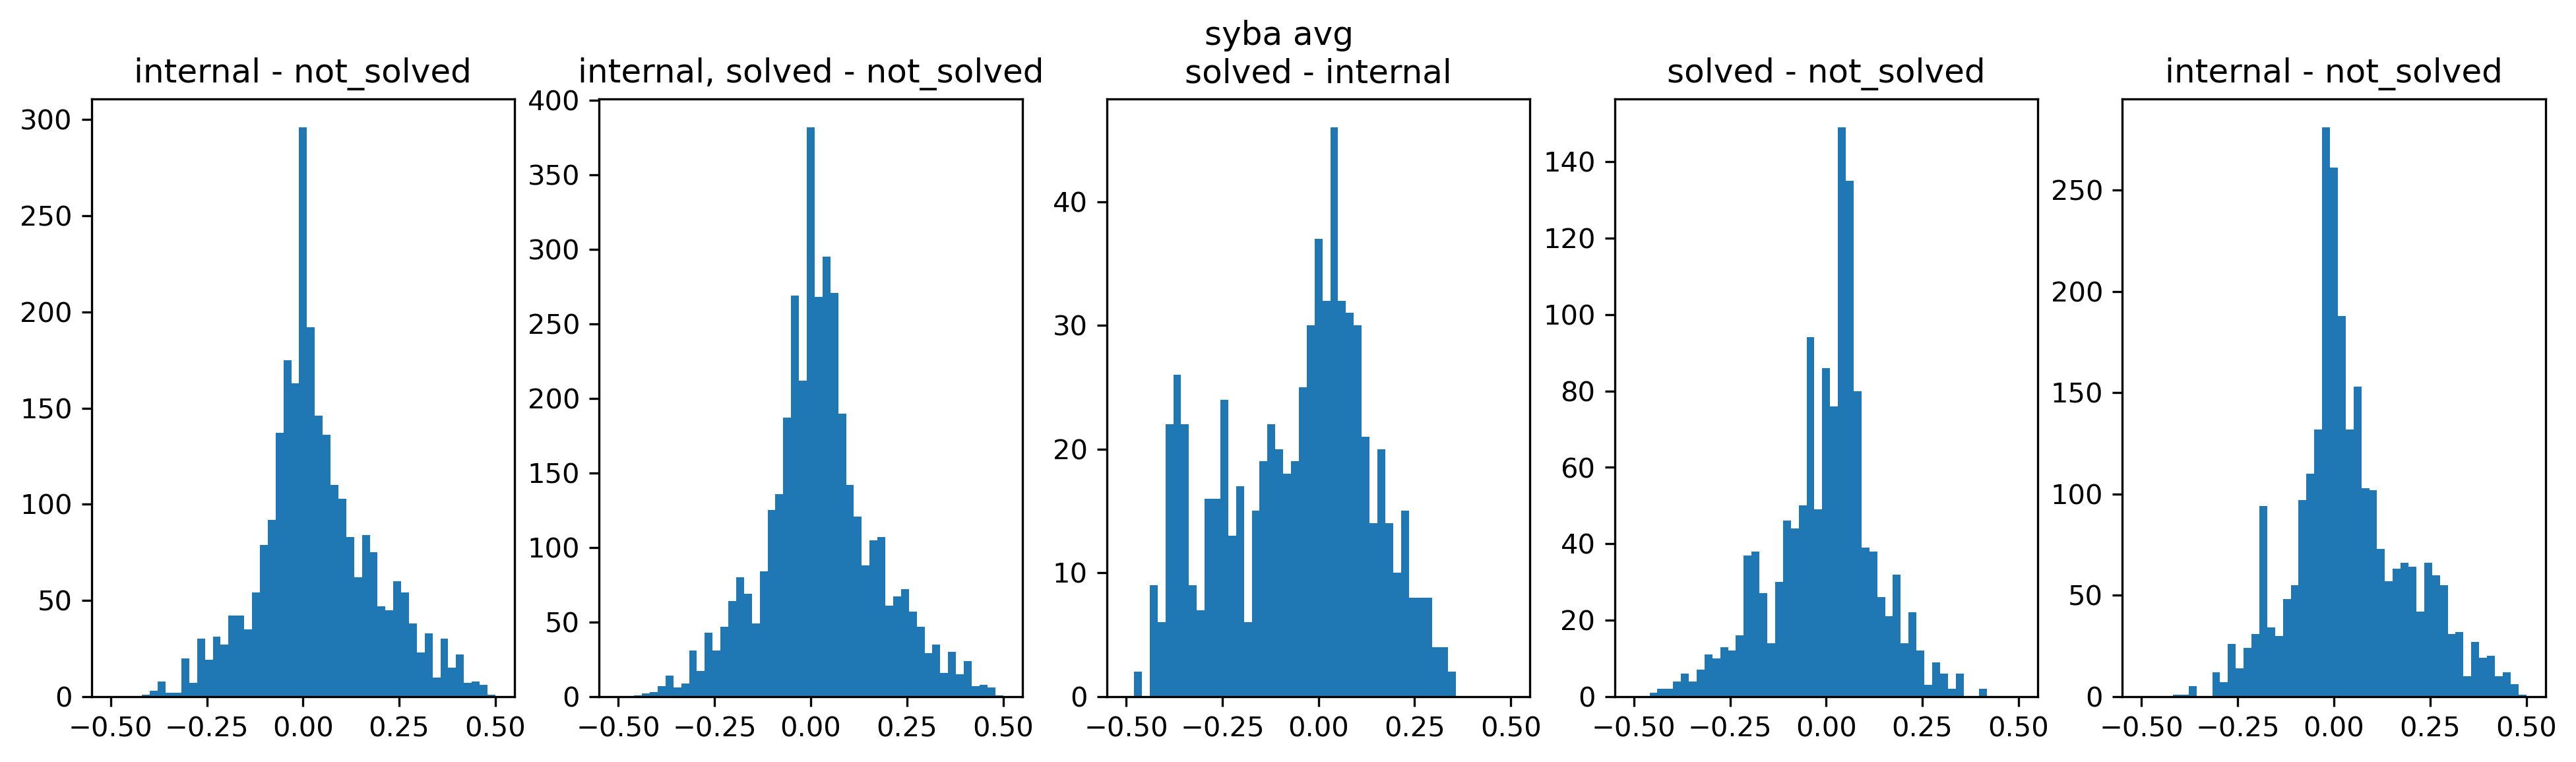

In [3]:
# Version with separate histogram for every pair type
plt.rcParams.update({'font.size': 10})

for score_name, one_picture_data in histogram_siblings_data.items():
    # Iterate over min, max, avg
    if score_name != "ai":
        for _, (agg_name, single_panel_data) in enumerate(one_picture_data):
            fig, axs = plt.subplots(nrows=1, ncols=len(analyzed_types),
                                    figsize=(16, 4), sharex=True)
            fig.set_dpi(300)
            fig.suptitle(" ".join((score_name, agg_name)))
            for panel_id, (pair_typename, one_type_pairs) in enumerate(zip(analyzed_types, single_panel_data)):
                axs[panel_id].hist(one_type_pairs, bins=np.linspace(-0.5,0.5, 50))
                axs[panel_id].set_title(", ".join(pair_typename[0]) + " - " + ", ".join(pair_typename[1]))

In [4]:
# Same as above but in table
from scipy.stats import ttest_1samp
import tabulate

title = False
rows = [[]]

# P-values of t-test for alternative hypothesis that mean is grater than 0.

for score_name, one_picture_data in histogram_siblings_data.items():
    # Iterate over min, max, avg
    if score_name != "ai":
        for _, (agg_name, single_panel_data) in enumerate(one_picture_data):
            row = [" ".join((score_name, agg_name))]
            for panel_id, (pair_typename, one_type_pairs) in enumerate(zip(analyzed_types, single_panel_data)):
                if not title:
                    rows[0].append(", ".join(pair_typename[0]) + " - " + ", ".join(pair_typename[1]))
                test_result = ttest_1samp(one_type_pairs, 0,
                                                   alternative="greater")
                row.append(test_result.pvalue)
            title = True
            rows.append(row)

tabulate.tabulate(rows, headers="firstrow",tablefmt='html')

,internal - not_solved,"internal, solved - not_solved",solved - internal,solved - not_solved,internal - not_solved
sa min,4.84699e-32,1.45083e-139,3.81835e-76,1.05501e-150,6.2311e-78
sa max,1.37157e-116,6.35385e-285,3.09312e-33,7.20347e-203,6.77882e-129
sa avg,1.17913e-133,0,2.16225e-66,1.90549e-286,1.71261e-149
sc min,1,1,2.56994e-07,1,1
sc max,2.9909e-18,3.55695e-61,8.26925e-86,6.56632e-61,4.24564e-07
sc avg,0.795641,0.962308,3.98488e-26,0.973092,0.984599
ra min,7.85228e-09,1.6563e-10,0.981442,0.00128385,3.96972e-09
ra max,9.93591e-07,5.14886e-08,0.933544,0.0039912,4.13207e-06
ra avg,7.07942e-08,2.33154e-09,0.96375,0.00234025,1.24663e-07
mf min,7.93304e-10,1.29709e-19,1,1.03781e-13,8.68432e-17
